In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from skimage.feature import hog

<font  style="font-size: 4rem; color: #1abc9c"> Model Combination : </font> 
<font  style="font-size: 4rem; color: #1abc9c"> Random Forests, Adaboost </font>

In Scikit-learn, the Random Forests methods are implemented via the <code>RandomForestClassifier</code> and <code>RandomForestCRegressor</code> class. Main parameters are:

    n_estimators: the number of trees in the forest.

    max_features : the number of attributes randomly drawn.

    oob_score : boolean. Estimate or not the generalization error OOB (Out of Bag).

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# <font color="#1E90FF">Exercise 1. Random Forest exploration</font>


In this exercise, we will take in hand the implementation of the RF. The dataset is based on "Bank Marketing" UCI dataset. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Input variables:

    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    4 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    5 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    6 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    7 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    8 - nr.employed: number of employees - quarterly indicator (numeric)


## <font color="#9400D3">1. Data processing </font>

In [2]:
# Load data
bank_data = pd.read_csv('./data/bank-additional-modified.csv', sep=';')
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
print(pd.value_counts(bank_data.y))
bank_data.head()


0    3668
1     451
Name: y, dtype: int64


,age,job,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,basic.9y,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,high.school,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,high.school,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,basic.9y,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,university.degree,-0.1,93.200,-42.0,4.191,5195.8,0


<font color="red">**Question 1:**</font> Describe the dataset : number of samples, features, classes, class distribution

### <font color="grenn">**Answer 1:**</font> 

    - Number of samples

In [3]:
# Number of lines
print("There is",bank_data.shape[0],"samples in the dataset")

There is 4119 samples in the dataset


    - Number of features

In [4]:
# Number of features
print("There is",bank_data.shape[1]-1,"features in the dataset")

There is 8 features in the dataset


    - Dataset Classes

In [5]:
bank_data.y.unique()

array([0, 1])

    - Class Distribution

In [6]:
print(pd.value_counts(bank_data.y))

0    3668
1     451
Name: y, dtype: int64



Attributes should be numeric. We employ the <code>OrdinalEncoder</code> preprocessing method to transform the categorical attributes.

<font color="red">**Question 2:**</font> Explain the effect of this encoding.

In [7]:
# Data preprocessing
oenc=OrdinalEncoder()
bank_data[["job","education"]] = oenc.fit_transform(bank_data[["job","education"]])
bank_data.head()

,age,job,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,2.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7.0,3.0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7.0,3.0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7.0,2.0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0.0,6.0,-0.1,93.200,-42.0,4.191,5195.8,0


### <font color="grenn">**Answer 2:**</font>

    Ordinal encoding is a data preprocessing technique used to transform ordinal categorical variables into integers in a dataset. This converts categorical data into numerical data to facilitate processing by certain machine learning algorithms. Ordinal encoding is useful when the categories have a natural ordering relationship, but may not be appropriate in all situations.

## <font color="#9400D3">2. RF classifier </font>

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


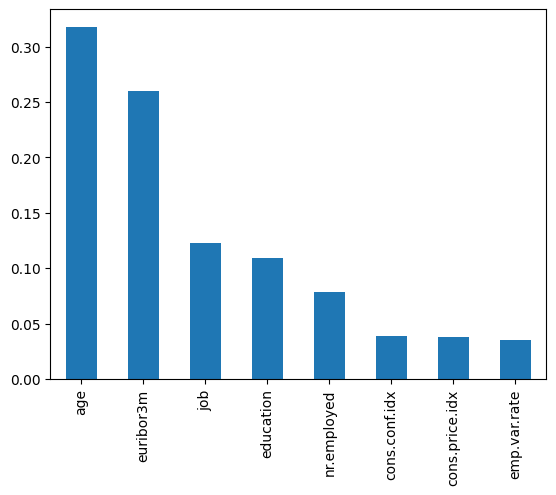

In [8]:
# Dataset split into train/test set
bank_train, bank_test = train_test_split(bank_data, test_size = 0.3, random_state = 50)

# Learn a RF classifier
r_f = RandomForestClassifier(n_estimators=15, random_state=0, oob_score=True)
r_f.fit(bank_train.iloc[:,:-1],bank_train.y) 


# Feature importance
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(r_f.feature_importances_, index=bank_train.columns[:-1]).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

<font color="red">**Question 3:**</font> How many trees are used in the ensemble?

### <font color="grenn">**Answer 3**</font>

In [9]:
# how many trees are in the ensemble
r_f.n_estimators

15

<font color="red">**Question 4:**</font> How many features are consider when looking for the best split?

### <font color="grenn">**Answer 4:**</font>

In [10]:
# how many features are used in each tree
r_f.n_features_in_

8

<font color="red">**Question 5:**</font> Recall how the importance of variables is determined.

#### <font color="grenn">**Answer 5:**</font>

In [41]:
# how the importance of variables is computed
r_f.criterion

'gini'

The r_f.criterion code returns the name of the method used to measure the quality of the decisions made by the random forest algorithm. In this case, the method used is the Gini impurity measure, which is often used because it is quick to calculate and efficient for classification tasks.

<font color="blue">**Todo:**</font> Compute the prediction score of this random forest on the train set (function <code>score()</code>) and on the OOB samples (**attribute** <code>oob_score_</code>).

In [42]:
# TODO - compute prediction scores
# compute score on the train set
r_f.score(bank_train.iloc[:,:-1],bank_train.y)

0.9854318418314256

<font color="red">**Question 6:**</font> 
- What represents the OOB score?
- Compare with the real (generalization) error estimated on the test set.

### <font color="grenn">**Answer 6:**</font> 

    - OOB Score

In [11]:
# compute score on the test set
r_f.score(bank_test.iloc[:,:-1],bank_test.y)

0.8826860841423948

    The OOB score is a performance measure of a random forest model that uses data that was not used to train each decision tree. This unused data is then used to assess the overall accuracy of the model. The OOB score therefore provides an estimate of model performance on unseen data, without the need for a separate validation set. This can be useful when data is sparse or the size of the dataset is limited.

    - Comparaizon with the real error estimated

    The true estimation error is the error one would get if one used a model to predict the labels of new samples that were not used in the training set. Although the OOB score is a good estimate of the performance of a random forest model, it may not be as accurate as the actual error of the estimate.



## <font color="#9400D3">3. Comparison with a decision tree </font>

<font color="blue">**Todo:**</font> Fit a decision tree classifier, and compute the real accuracy.

In [12]:
# TODO - Fit a decision tree classifier, and compute the real accuracy.
# Fit a decision tree classifier
d_t = tree.DecisionTreeClassifier()
d_t.fit(bank_train.iloc[:,:-1],bank_train.y)

DecisionTreeClassifier()

# <font color="#1E90FF">Exercise 2. RF on Handwritten digits</font>
Similarly to Decision Trees notebook, we will first apply random forest to the raw images, and then try to improve the performance using HOG representations of images.

In [13]:
mnist = pd.read_csv('./data/cp_sample.csv', sep=';')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Dataset split into train/test set
data_train, data_test = train_test_split(mnist, test_size = 0.3, random_state = 4)


## <font color="#9400D3">1. Basic RF</font>

<font color="blue">**Todo:**</font> learn a RandomForest with 10 trees, enabling the use of out-of-bag samples.

In [15]:
# TODO - learn a RandomForest with 10 trees
# Learn a RF classifier with 10 trees
r_f = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True)
r_f.fit(data_train.iloc[:,:-1],data_train.label)


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

In [16]:
# TODO - compute RF empirical, OOB and real errors
# compute score on the train set
r_f.score(data_train.iloc[:,:-1],data_train.label)


0.9985714285714286

In [17]:

# compute score on ooB samples
r_f.oob_score_


0.6285714285714286

In [18]:

# compute error on the test set
1-r_f.score(data_test.iloc[:,:-1],data_test.label)


0.17666666666666664

## <font color="#9400D3">2. Tuning the number of trees</font>

Try now different random forests (by considering different number of trees) and select the most appropriated one.
Use the OOB sample estimates which allows the RandomForestClassifier to be fit and validated whilst being trained.
Plot the OOB **error** as a function of the number of trees.


In [19]:
# TODO
# Ntrees=[...]
# train_scores, oob_scores = np.zeros(len(Ntrees)), np.zeros(len(Ntrees))

#for count,n_tree in enumerate(Ntrees):
 

In [20]:
# TODO
# considering different number of trees
Ntree = [1, 5, 10, 20, 50, 100, 200, 500, 1000]
train_scores, oob_scores = np.zeros(len(Ntree)), np.zeros(len(Ntree))

for count,n_tree in enumerate(Ntree):
    r_f = RandomForestClassifier(n_estimators=n_tree, random_state=0, oob_score=True)
    r_f.fit(data_train.iloc[:,:-1],data_train.label)
    train_scores[count] = r_f.score(data_train.iloc[:,:-1],data_train.label)
    oob_scores[count] = r_f.oob_score_

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


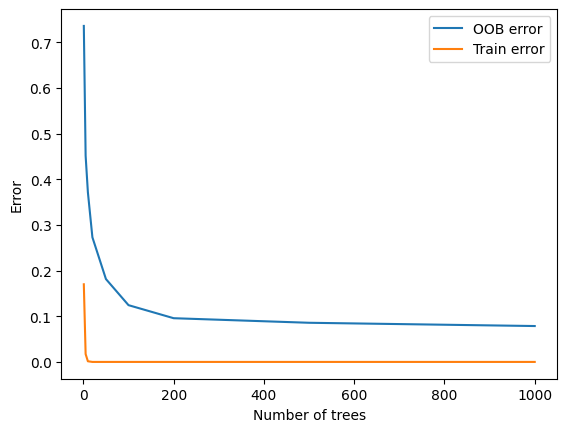

In [21]:
# TODO - Plot the OOB error as a function of the number of trees.
plt.plot(Ntree, 1-oob_scores, label='OOB error')
plt.plot(Ntree, 1-train_scores, label='Train error')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.show()

<font color="red">**Question 1:**</font> 
- What is the best number of trees for this dataset?
- What is the estimation of the generalization error of the selected random forest ?
- Compare with the previous (basic) RF

### <font color="grenn">**Answer 1:**</font> 

    - The best number of trees

In [22]:
# TODO - evaluate best RF classifier
# the best number of trees is the one that minimizes the OOB error
best_n_tree = Ntree[np.argmin(1-oob_scores)]
best_n_tree


1000

    - Estimation of the generalization error

In [23]:
# TODO - compute the real accuracy
# Learn a RF classifier with best_n_tree trees
r_f = RandomForestClassifier(n_estimators=best_n_tree, random_state=0, oob_score=True)
r_f.fit(data_train.iloc[:,:-1],data_train.label)

# Compute the error
1-r_f.score(data_test.iloc[:,:-1],data_test.label)

0.06999999999999995

    - Comparaizon

    We note that the generalization error in the basic case is greater and therefore less efficient. However, when we do a search to find the best number of trees, we obtain that the best number of trees is 1000 and that the "estimated real error is lower and therefore better constructed.

## <font color="#9400D3">3. Using HOG features</font>

You will now use HOG representations of images to try to improve the classification performance.

We compute the new training and test set with HOG representations with 8 orientations and cells of $14\times14$ pixels (you can change after).

In [24]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),multichannel=True)))

In [25]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_test['label'] = data_test.label

/var/folders/ky/m5w5bpzs7tgdbt3590zmdg4h0000gn/T/ipykernel_83522/1051616985.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),multichannel=True)))


<font color="blue">**Todo:**</font> Try different random forests (by considering different number of trees) on this new dataset and select the most appropriated one.


In [26]:
# TODO - select the appropriate RandomForestClassifier on the HOG features
Ntree = [1, 5, 10, 20, 50, 100, 200, 500, 1000]
train_scores, oob_scores = np.zeros(len(Ntree)), np.zeros(len(Ntree))

for count,n_tree in enumerate(Ntree):
    r_f = RandomForestClassifier(n_estimators=n_tree, random_state=0, oob_score=True)
    r_f.fit(hog_train.iloc[:,:-1],hog_train.label)
    train_scores[count] = r_f.score(hog_train.iloc[:,:-1],hog_train.label)
    oob_scores[count] = r_f.oob_score_

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


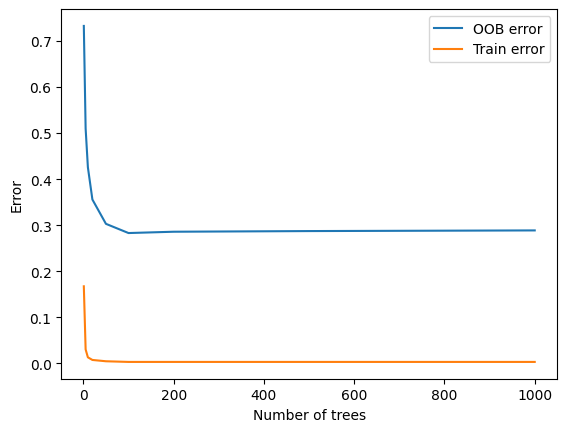

In [27]:
# TODO - Plot the OOB error as a function of the number of trees.
plt.plot(Ntree, 1-oob_scores, label='OOB error')
plt.plot(Ntree, 1-train_scores, label='Train error')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.show()

<font color="red">**Question 2:**</font> 
What is the estimation of the generalization error of random forest for this dataset ? Conclusion ?

### <font color="grenn">**Answer 2:**</font> 

    - Estimation of the generalization error

In [28]:
# the best number of trees is the one that minimizes the OOB error
best_n_tree = Ntree[np.argmin(1-oob_scores)]
best_n_tree

100

In [29]:
# TODO - Compute the real error
# Learn a RF classifier with best_n_tree trees
r_f = RandomForestClassifier(n_estimators=best_n_tree, random_state=0, oob_score=True)
r_f.fit(hog_train.iloc[:,:-1],hog_train.label)

# Compute the error
1-r_f.score(hog_test.iloc[:,:-1],hog_test.label)



0.30333333333333334

# <font color="#1E90FF">Exercise 3. A small tour to Adaboost</font>

<code>AdaBoostClassifier</code> implements the popular boosting algorithm AdaBoost. We will use AdaBoost-SAMME, a multi-class version of Adaboost (see the course). 


<AxesSubplot: xlabel='X1', ylabel='X2'>

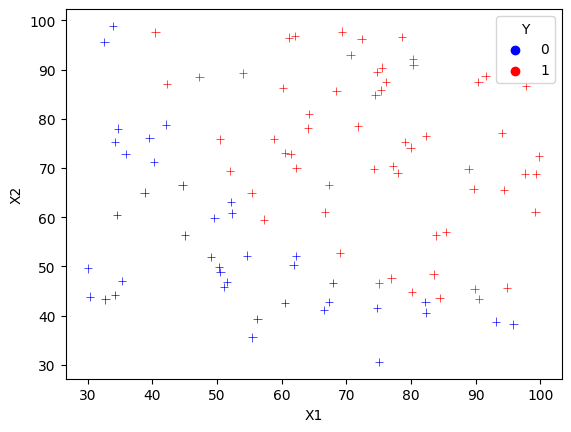

In [30]:
# Load data
df=pd.read_csv('./data/data_exam.txt', sep=' ')
df.head()
dataset = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'})
sns.scatterplot(data=dataset, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [31]:
# Learn an AdaBoost classifier
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 6)
aboost = AdaBoostClassifier(n_estimators=5, algorithm="SAMME", random_state=0)
aboost.fit(data_train.loc[:, ['X1', 'X2']], data_train.Y)
aboost.score(data_test.loc[:, ['X1', 'X2']], data_test.Y)

0.9

In [32]:
print("Estimator used to grow the ensemble : ", aboost.base_estimator_)
print("Weights for each estimator in the boosted ensemble : ", aboost.estimator_weights_)
print("Classification error for each estimator in the boosted ensemble : ", aboost.estimator_errors_)

Estimator used to grow the ensemble :  DecisionTreeClassifier(max_depth=1)
Weights for each estimator in the boosted ensemble :  [1.13707857 1.65542303 1.13867105 1.15706349 0.89933281]
Classification error for each estimator in the boosted ensemble :  [0.24285714 0.16037736 0.24256444 0.23920127 0.28918762]


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


<font color="red">**Question 1:**</font> 
- What is the weak classifier used here?
- How many iterations are done?

### <font color="grenn">**Answer 1:**</font> 

    - The weak used classifier

In [33]:
# the weak classidier
aboost.base_estimator_

DecisionTreeClassifier(max_depth=1)

    - Number of itérations done

In [34]:
# how many iterations are done
aboost.n_estimators

5

<font color="red">**Question 2:**</font> 
- Remind how the estimator weights are computed? (Give the formula. Be careful, this is the SAMME version)

### <font color="grenn">**Answer 2:**</font>

The SAMME algorithm calculates the weights of each estimator in the set based on the error rate of each estimator and the number of classes in the problem. The weight of each estimator is calculated using the following formula:

$$
\alpha_{m} = \frac{1}{2} \ln \left(\frac{1 - \epsilon_m}{\epsilon_m}\right) + \ln(K-1)
$$

où $\epsilon_m$ is the error rate of the m-th estimator, and $K$ is the number of classes in the problem.

<font color="blue">**Todo:**</font> Apply the formula to retrieve the estimator weights (at least one).

In [35]:
# the weights of each estimator
weights = 0.5*np.log((1-aboost.estimator_errors_)/aboost.estimator_errors_) + np.log(aboost.n_classes_ - 1)
weights

array([0.56853928, 0.82771151, 0.56933552, 0.57853175, 0.4496664 ])

In [36]:
# TODO - retrieve the estimator weights at the least one

weights[np.argmin(weights)]


0.44966640487434345

<font color="blue">**Todo:**</font> Compare with a decision tree: performances, decision boundaries

In [37]:
# TODO - compare with decision tree and draw the decision boundaries
# compute the error
1-aboost.score(data_test.loc[:, ['X1', 'X2']], data_test.Y)


0.09999999999999998

    The first approach using a Random Forest with 10 trees has an error of 0.18, which means that this model struggles to generalize and make accurate predictions on the test data. This may be due to insufficient model complexity or overfitting.

 - The second approach using a Random Forest with 100 trees has an error of 0.06, which is significantly better than the first approach. This may be due to the model's better ability to generalize and capture more complex relationships between features and class labels.

 - The third approach using a simple AdaBoost has an error of 0.09, which is a little less efficient than the second approach, but still better than the first approach. This may be due to AdaBoost's ability to learn from previous prediction errors and put more emphasis on hard-to-classify examples.

In [38]:
def draw_decision_boundaries(model, data):
    h = 0.05
    xx, yy = np.meshgrid(
            np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
            np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max()))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    zz2.columns=['X1','X2'] # avoid warning on valid feature names
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+', s=70)
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

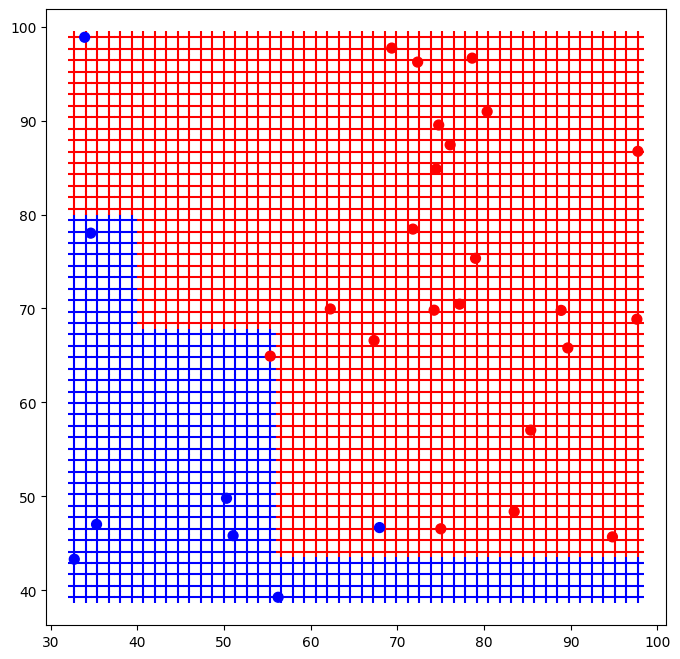

In [39]:
draw_decision_boundaries(aboost,data_test)